In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Загрузим данные
# Предположим, что данные находятся в файле 'banana_quality.csv'
df = pd.read_csv('banana_quality.csv')

# Посмотрим на первые несколько строк данных
print(df.head())


       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good  


In [ ]:

# Преобразуем категориальные переменные, если это необходимо
df['Quality'] = df['Quality'].replace({'Good': 1, 'Bad': 0})

# Разделим данные на признаки (X) и целевую переменную (y)
X = df.drop('Quality', axis=1)
y = df['Quality']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[-0.12871651  1.07045442  1.51504861 ...  0.18683435  0.47498861
   1.57871862]
 [ 1.04856399  0.03601823 -0.44882431 ...  0.59268137  0.07537606
  -0.90576172]
 [ 1.43560469 -0.97236708 -0.54924477 ...  1.23779229 -0.15793015
  -0.87537607]
 ...
 [-0.73640927  1.12540046  1.80323068 ... -0.8718702  -0.17849007
   0.2863105 ]
 [ 0.93684588 -0.34610155 -2.04862932 ... -0.03617002 -1.24357675
   1.45495391]
 [-0.28951743 -2.69859376 -1.26825281 ... -1.29264642 -1.00278099
  -0.69562051]]
[[-0.20308691 -0.36750409 -0.31578825 ...  0.30551022  0.72662353
  -0.79491469]
 [-0.67231714 -1.01036267 -0.31759751 ...  0.36553814  2.24192852
  -2.15395337]
 [ 0.33928839  0.98793417  2.84839449 ... -0.87747582 -0.86829228
   1.11355193]
 ...
 [-1.00847385  2.10782068  1.1715271  ... -0.15286376  0.4624638
  -0.4202521 ]
 [-0.01880449 -0.46380483 -0.45616072 ...  1.20410475 -1.98258268
   0.91252106]
 [ 1.81009259 -0.69797805 -2.53789133 ... -1.6975016  -1.65913529
   0.07714879]]


In [ ]:
print(df)

          Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
0    -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570   
1    -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549   
2    -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643   
3    -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001   
4     0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345   
...        ...       ...        ...       ...          ...       ...   
7995 -6.414403  0.723565   1.134953  2.952763     0.297928 -0.156946   
7996  0.851143 -2.217875  -2.812175  0.489249    -1.323410 -2.316883   
7997  1.422722 -1.907665  -2.532364  0.964976    -0.562375 -1.834765   
7998 -2.131904 -2.742600  -1.008029  2.126946    -0.802632 -3.580266   
7999 -2.660879 -2.044666   0.159026  1.499706    -1.581856 -1.605859   

       Acidity  Quality  
0     0.271290        1  
1     0.307325        1  
2     1.427322        1  
3     0.477862        1  
4    

In [ ]:
# Обучим модель логистической регрессии
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Выведем отчет о классификации для тестовой выборки
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       781
           1       0.88      0.89      0.88       819

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



In [ ]:
# Выведем коэффициенты модели, чтобы оценить влияние каждой переменной
importances = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(importances)

             Importance
Weight         2.018455
Sweetness      1.489576
Size           1.424860
Ripeness       1.267293
HarvestTime    1.135015
Softness       0.168677
Acidity       -0.267814


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

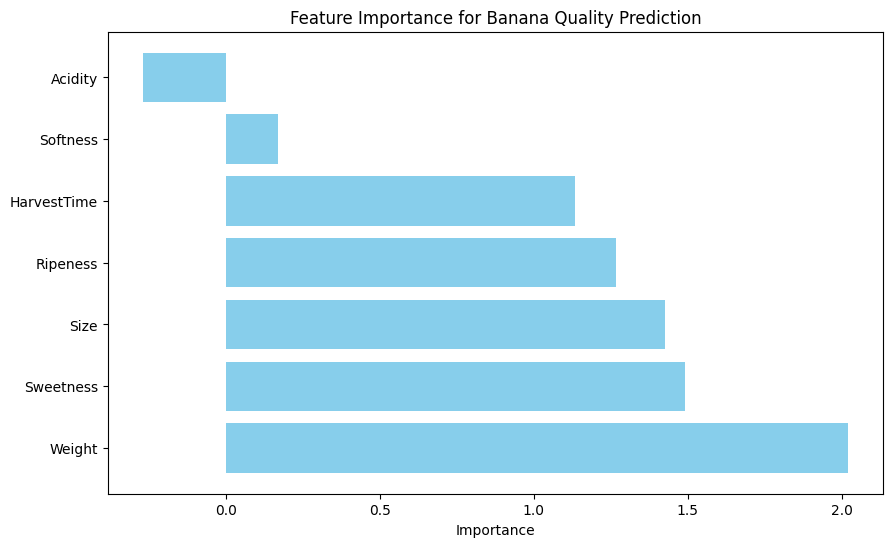

In [ ]:
#Построение графика
plt.figure(figsize=(10, 6))
plt.barh(importances.index, importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Banana Quality Prediction')
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Данные важности признаков, как описано выше
data = {
    "Feature": ["Weight", "Sweetness", "Size", "Ripeness", "HarvestTime", "Softness", "Acidity"],
    "Importance": [2.018455, 1.489576, 1.424860, 1.267293, 1.135015, 0.168677, -0.267814]
}
df_fig = pd.DataFrame(data)

# Сортируем данные для лучшего отображения
df_fig = df_fig.sort_values(by="Importance", ascending=True)

# Создаем график
fig = px.bar(df_fig, x="Importance", y="Feature", orientation='h',
             title="Feature Importance for Banana Quality Prediction",
             labels={"Feature": "Feature", "Importance": "Importance"},
             color="Importance",
             color_continuous_scale=px.colors.sequential.Viridis)

# Отображаем график
fig.show()

# ДЗ №2

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Предположим, что данные загружены в DataFrame
data = pd.read_csv('banana_quality.csv')

# Преобразование категориальной переменной 'Quality'
data['Quality'] = data['Quality'].map({'Good': 1, 'Bad': 0})

# Выделение признаков и целевой переменной
X = data.drop('Quality', axis=1)
y = data['Quality']

# Разбиение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Константное предсказание: выбор наиболее частого класса
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)

# Измерение качества
dummy_accuracy = accuracy_score(y_test, dummy_pred)
print(f"Accuracy of constant prediction: {dummy_accuracy}")


Accuracy of constant prediction: 0.488125


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение логистической регрессии
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
predictions = model.predict(X_test_scaled)

# Измерение качества
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of logistic regression: {accuracy}")


Accuracy of logistic regression: 0.879375


In [10]:
import plotly.graph_objects as go

# Метрики точности для обеих моделей
baseline_accuracy = dummy_accuracy
model_accuracy = accuracy

# Создание фигуры с библиотекой Plotly
fig = go.Figure()

# Добавление данных для бейзлайновой модели
fig.add_trace(go.Bar(
    x=['Baseline Model'],
    y=[baseline_accuracy],
    name='Baseline Model',
    marker_color='indianred'
))

# Добавление данных для обученной модели
fig.add_trace(go.Bar(
    x=['Trained Model'],
    y=[model_accuracy],
    name='Trained Model',
    marker_color='lightsalmon'
))

# Добавление настроек графика
fig.update_layout(
    title='Comparison of Model Accuracies',
    xaxis_title='Model',
    yaxis_title='Accuracy (%)',
    barmode='group'
)

# Показать график
fig.show()
